In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="darkgrid")

In [4]:
df = pd.read_csv('/Users/ar/Desktop/Insurance/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [9]:
df.shape

(1338, 7)

In [10]:
le_sex = LabelEncoder()
le_smoker = LabelEncoder()
le_region=LabelEncoder()

In [11]:
df['Gender']=le_sex.fit_transform(df.sex)
df['Smoker']=le_smoker.fit_transform(df.smoker)
df['Region']=le_region.fit_transform(df.region)

In [12]:
df.head()

,age,sex,bmi,children,smoker,region,charges,Gender,Smoker,Region
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1


In [13]:
df.drop(["sex",'smoker','region'],axis=1,inplace=True)

In [14]:
df.rename(columns={"age":'Age',
                  'bmi':"BMI",
                  'children' : "Children",
                  'charges' : "Charges"
                  },inplace=True)

In [15]:
df = df[['Age','Gender','BMI','Children','Smoker','Region','Charges']]

In [16]:
df.head()

,Age,Gender,BMI,Children,Smoker,Region,Charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [17]:
df.Charges.mean()

13270.422265141257

In [18]:
df.Charges.max()

63770.42801

In [19]:
df.Charges.min()

1121.8739

<AxesSubplot:xlabel='Charges', ylabel='Density'>

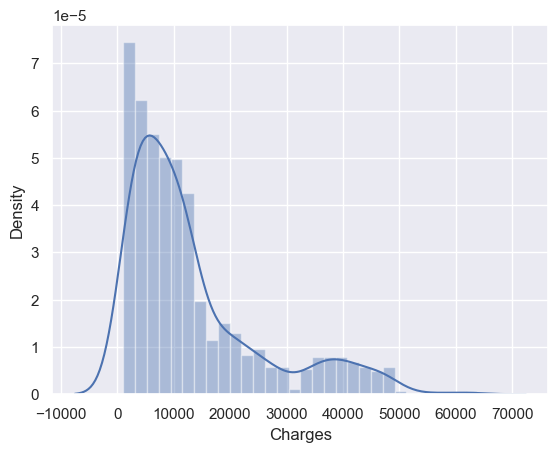

In [20]:
sns.distplot(df.Charges)

In [21]:
df.Charges

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: Charges, Length: 1338, dtype: float64

In [22]:
df['Target'] = df['Charges'].apply(int)

In [23]:
df.head(10)

,Age,Gender,BMI,Children,Smoker,Region,Charges,Target
0,19,0,27.900,0,1,3,16884.92400,16884
1,18,1,33.770,1,0,2,1725.55230,1725
2,28,1,33.000,3,0,2,4449.46200,4449
3,33,1,22.705,0,0,1,21984.47061,21984
4,32,1,28.880,0,0,1,3866.85520,3866
5,31,0,25.740,0,0,2,3756.62160,3756
6,46,0,33.440,1,0,2,8240.58960,8240
7,37,0,27.740,3,0,1,7281.50560,7281
8,37,1,29.830,2,0,0,6406.41070,6406
9,60,0,25.840,0,0,1,28923.13692,28923


In [24]:
df.corr()

,Age,Gender,BMI,Children,Smoker,Region,Charges,Target
Age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.299009
Gender,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,0.057293
BMI,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.198342
Children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,0.067999
Smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,0.787251
Region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,-0.006209
Charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,1.000000
Target,0.299009,0.057293,0.198342,0.067999,0.787251,-0.006209,1.000000,1.000000


<AxesSubplot:>

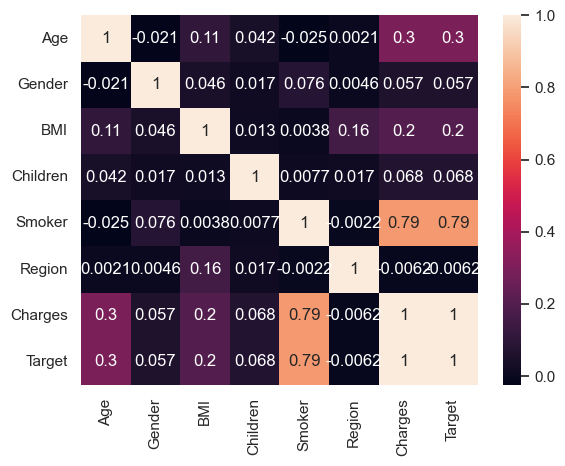

In [25]:
sns.heatmap(df.corr(),annot=True)

In [26]:
df.Target.median()

9381.5

In [27]:
df.Target.mean()

13269.928998505231

In [28]:
df.Target.max()

63770

In [29]:
df.Target.min()

1121

In [30]:
df['SplitTargetMean']=df['Target'].apply(lambda x:1 if x>=9382 else 0)

In [31]:
df['SplitTargetMedian']=df['Target'].apply(lambda x:1 if x>=13269 else 0)

In [32]:
df.head()

,Age,Gender,BMI,Children,Smoker,Region,Charges,Target,SplitTargetMean,SplitTargetMedian
0,19,0,27.900,0,1,3,16884.92400,16884,1,1
1,18,1,33.770,1,0,2,1725.55230,1725,0,0
2,28,1,33.000,3,0,2,4449.46200,4449,0,0
3,33,1,22.705,0,0,1,21984.47061,21984,1,1
4,32,1,28.880,0,0,1,3866.85520,3866,0,0


In [33]:
df.SplitTargetMean.value_counts()

1    669
0    669
Name: SplitTargetMean, dtype: int64

In [34]:
df.SplitTargetMedian.value_counts()

0    918
1    420
Name: SplitTargetMedian, dtype: int64

In [35]:
df.columns

Index(['Age', 'Gender', 'BMI', 'Children', 'Smoker', 'Region', 'Charges',
       'Target', 'SplitTargetMean', 'SplitTargetMedian'],
      dtype='object')

<AxesSubplot:xlabel='Target'>

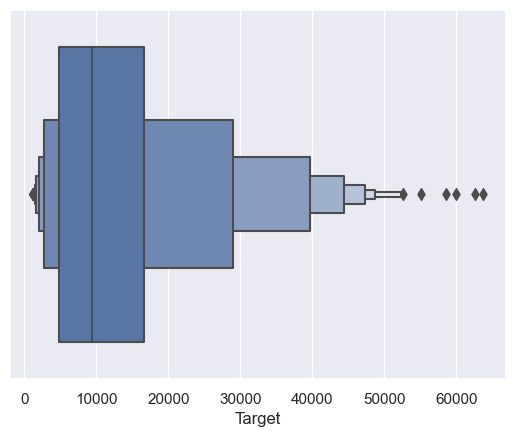

In [36]:
sns.boxenplot(df.Target)

<AxesSubplot:xlabel='BMI'>

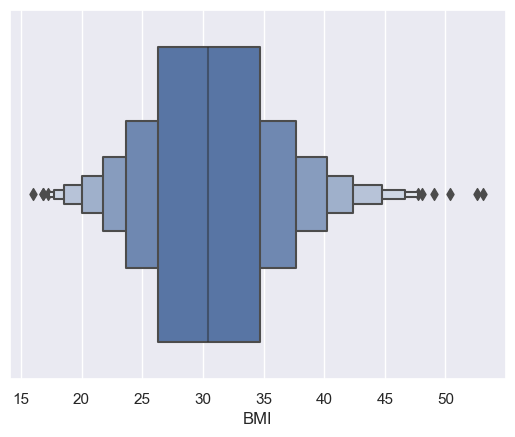

In [37]:
sns.boxenplot(df.BMI)

In [38]:
df.drop("SplitTargetMean",axis=1,inplace=True)

In [39]:
df.head()

,Age,Gender,BMI,Children,Smoker,Region,Charges,Target,SplitTargetMedian
0,19,0,27.900,0,1,3,16884.92400,16884,1
1,18,1,33.770,1,0,2,1725.55230,1725,0
2,28,1,33.000,3,0,2,4449.46200,4449,0
3,33,1,22.705,0,0,1,21984.47061,21984,1
4,32,1,28.880,0,0,1,3866.85520,3866,0


In [40]:
#Age

<AxesSubplot:xlabel='Age', ylabel='Density'>

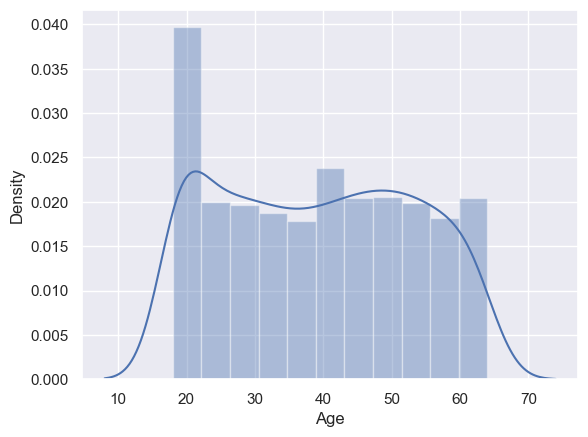

In [41]:
sns.distplot(df.Age)

In [42]:
df.Age.min(), df.Age.mean(),df.Age.median(), df.Age.max()

(18, 39.20702541106129, 39.0, 64)

In [43]:
age_less_20 = df[(df['Age']<=20)]
age_less_20.shape[0]

166

In [44]:
age_less_20.head()

,Age,Gender,BMI,Children,Smoker,Region,Charges,Target,SplitTargetMedian
0,19,0,27.900,0,1,3,16884.92400,16884,1
1,18,1,33.770,1,0,2,1725.55230,1725,0
15,19,1,24.600,1,0,3,1837.23700,1837,0
22,18,1,34.100,0,0,2,1137.01100,1137,0
31,18,0,26.315,0,0,0,2198.18985,2198,0


In [45]:
age_less_20.SplitTargetMedian.value_counts()

0    121
1     45
Name: SplitTargetMedian, dtype: int64

In [46]:
age_less_20.Smoker.value_counts()

0    127
1     39
Name: Smoker, dtype: int64

In [47]:
var1 = age_less_20[(age_less_20['Smoker']==1)&(age_less_20['SplitTargetMedian']==1)]

In [48]:
len(var1)

38

In [49]:
age_less_40 = df[(df['Age']<=40)]
age_less_40.shape[0]

701

In [50]:
age_less_40.SplitTargetMedian.value_counts()

0    513
1    188
Name: SplitTargetMedian, dtype: int64

In [51]:
age_less_40.Smoker.value_counts()

0    552
1    149
Name: Smoker, dtype: int64

In [52]:
var2 = age_less_40[(age_less_40['Smoker']==1)&(age_less_40['SplitTargetMedian']==1)]

In [53]:
len(var2)

148

In [54]:
age_greater_40 = df[(df['Age']>40)]
age_greater_40.shape[0]

637

In [55]:
age_greater_40.SplitTargetMedian.value_counts()

0    405
1    232
Name: SplitTargetMedian, dtype: int64

In [56]:
age_greater_40.Smoker.value_counts()

0    512
1    125
Name: Smoker, dtype: int64

In [57]:
var3 = age_greater_40[(age_greater_40['Smoker']==1)&(age_greater_40['SplitTargetMedian']==1)]

In [58]:
len(var3)

125

In [59]:
age_greater_60 = df[(df['Age']>60)]
age_greater_60.shape[0]

91

In [60]:
age_greater_60.SplitTargetMedian.value_counts()

1    79
0    12
Name: SplitTargetMedian, dtype: int64

In [61]:
age_greater_60.Smoker.value_counts()

0    69
1    22
Name: Smoker, dtype: int64

In [62]:
var4 = age_greater_60[(age_greater_60['Smoker']==1)&(age_greater_60['SplitTargetMedian']==1)]

In [63]:
len(var4)

22

In [64]:
a=age_less_20.Gender.value_counts()
print(a)
print("----------------------------")
b=age_less_40.Gender.value_counts()
print(b)
print("----------------------------")
c=age_greater_40.Gender.value_counts()
print(c)
print("----------------------------")
d=age_greater_60.Gender.value_counts()
print(d)
print("----------------------------")

1    86
0    80
Name: Gender, dtype: int64
----------------------------
1    360
0    341
Name: Gender, dtype: int64
----------------------------
0    321
1    316
Name: Gender, dtype: int64
----------------------------
0    47
1    44
Name: Gender, dtype: int64
----------------------------


<AxesSubplot:title={'center':'Age > 60'}, xlabel='Gender', ylabel='count'>

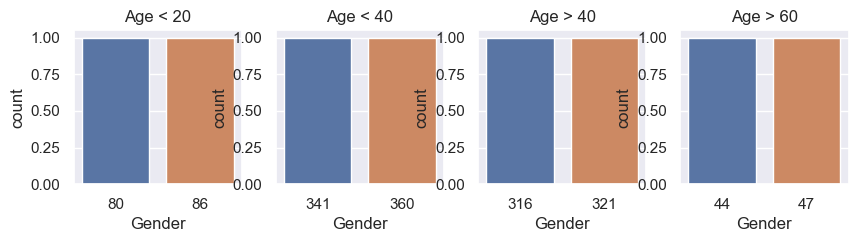

In [65]:
plt.figure(figsize=(10,2))
plt.subplot(1,4,1)
plt.title("Age < 20")
sns.countplot(a)
plt.subplot(1,4,2)
plt.title("Age < 40")
sns.countplot(b)
plt.subplot(1,4,3)
plt.title("Age > 40")
sns.countplot(c)
plt.subplot(1,4,4)
plt.title("Age > 60")
sns.countplot(d)

In [66]:
#Gender - 0 Female
#Gender - 1 Male

In [67]:
df.head(2)

,Age,Gender,BMI,Children,Smoker,Region,Charges,Target,SplitTargetMedian
0,19,0,27.90,0,1,3,16884.9240,16884,1
1,18,1,33.77,1,0,2,1725.5523,1725,0


<AxesSubplot:xlabel='Gender', ylabel='Smoker'>

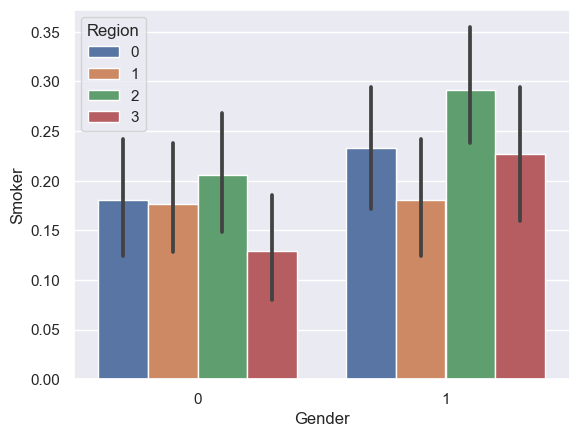

In [68]:
sns.barplot(x='Gender',y='Smoker',hue='Region',data=df)

In [69]:
df.Region.unique()

array([3, 2, 1, 0])

In [70]:
df1 = pd.read_csv('/Users/ar/Desktop/Insurance/insurance.csv')
df1.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [71]:
lst1=[]
for i in df1.region.unique():
    lst1.append(i)
    lst1.append(df1[(df1['region']==i)&df['SplitTargetMedian']==1].shape[0])

In [72]:
print(lst1)

['southwest', 85, 'southeast', 130, 'northwest', 96, 'northeast', 109]


In [73]:
print(df1['region'].value_counts())

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [74]:
dict1={
    'SouthWest':85, 'SouthEast':130, 'NorthWest':96, 'NorthEast':109
}

(-1.1098430803695873,
 1.1004687314872437,
 -1.1073251614802224,
 1.1138045101253369)

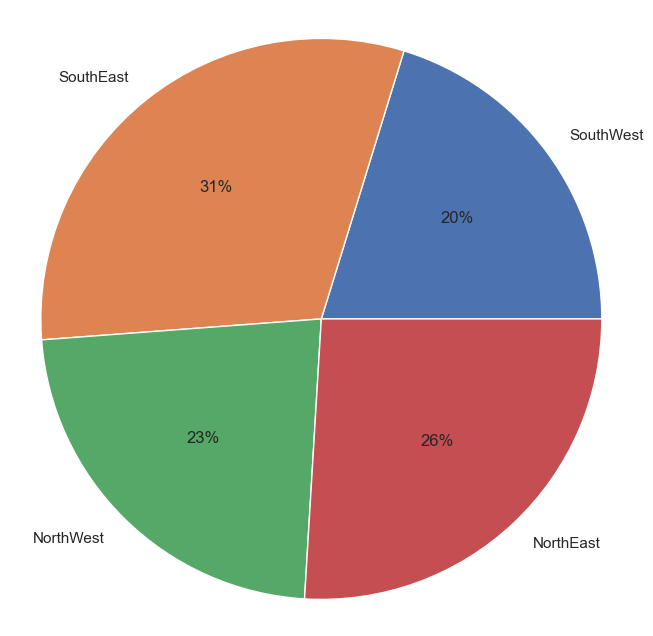

In [75]:
labels=[]
sizes=[]
for x,y in dict1.items():
    labels.append(x)
    sizes.append(y)
plt.figure(figsize=(8,8))
plt.pie(sizes,labels=labels,autopct='%1.0f%%')
plt.axis('equal')

In [76]:
df.head(3)

,Age,Gender,BMI,Children,Smoker,Region,Charges,Target,SplitTargetMedian
0,19,0,27.90,0,1,3,16884.9240,16884,1
1,18,1,33.77,1,0,2,1725.5523,1725,0
2,28,1,33.00,3,0,2,4449.4620,4449,0


<AxesSubplot:xlabel='BMI', ylabel='Density'>

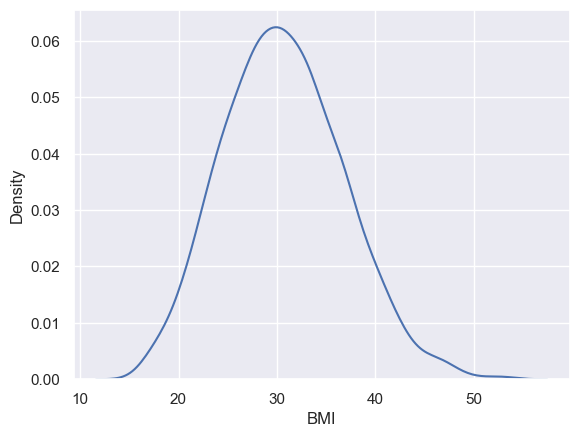

In [77]:
sns.kdeplot(df.BMI)

In [78]:
df.head(10)

,Age,Gender,BMI,Children,Smoker,Region,Charges,Target,SplitTargetMedian
0,19,0,27.900,0,1,3,16884.92400,16884,1
1,18,1,33.770,1,0,2,1725.55230,1725,0
2,28,1,33.000,3,0,2,4449.46200,4449,0
3,33,1,22.705,0,0,1,21984.47061,21984,1
4,32,1,28.880,0,0,1,3866.85520,3866,0
5,31,0,25.740,0,0,2,3756.62160,3756,0
6,46,0,33.440,1,0,2,8240.58960,8240,0
7,37,0,27.740,3,0,1,7281.50560,7281,0
8,37,1,29.830,2,0,0,6406.41070,6406,0
9,60,0,25.840,0,0,1,28923.13692,28923,1


In [79]:
df.BMI.mean(), df.BMI.median()

(30.663396860986538, 30.4)

In [80]:
bmi_greater_stm1 = df[(df['BMI']>30.4)&(df['SplitTargetMedian']==1)]

In [81]:
bmi_greater_stm1

,Age,Gender,BMI,Children,Smoker,Region,Charges,Target,SplitTargetMedian
14,27,1,42.130,0,1,2,39611.75770,39611,1
19,30,1,35.300,0,1,3,36837.46700,36837,1
23,34,0,31.920,1,1,0,37701.87680,37701,1
29,31,1,36.300,2,1,3,38711.00000,38711,1
30,22,1,35.600,0,1,3,35585.57600,35585,1
...,...,...,...,...,...,...,...,...,...
1291,19,1,34.900,0,1,3,34828.65400,34828,1
1301,62,1,30.875,3,1,1,46718.16325,46718,1
1313,19,0,34.700,2,1,3,36397.57600,36397,1
1318,35,1,39.710,4,0,0,19496.71917,19496,1


In [82]:
bmi_less_stm1 = df[(df['BMI']<=30.4)&(df['SplitTargetMedian']==1)]

In [83]:
bmi_less_stm1

,Age,Gender,BMI,Children,Smoker,Region,Charges,Target,SplitTargetMedian
0,19,0,27.900,0,1,3,16884.92400,16884,1
3,33,1,22.705,0,0,1,21984.47061,21984,1
9,60,0,25.840,0,0,1,28923.13692,28923,1
11,62,0,26.290,0,1,2,27808.72510,27808,1
25,59,0,27.720,3,0,2,14001.13380,14001,1
...,...,...,...,...,...,...,...,...,...
1308,25,0,30.200,0,1,3,33900.65300,33900,1
1314,30,0,23.655,3,1,1,18765.87545,18765,1
1321,62,1,26.695,0,1,0,28101.33305,28101,1
1328,23,0,24.225,2,0,0,22395.74424,22395,1


<AxesSubplot:xlabel='SplitTargetMedian', ylabel='Age'>

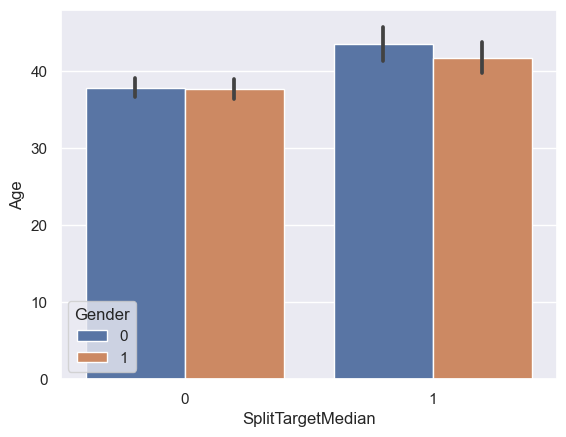

In [84]:
sns.barplot(y='Age',x='SplitTargetMedian',hue='Gender',data=df)

<AxesSubplot:xlabel='SplitTargetMedian', ylabel='BMI'>

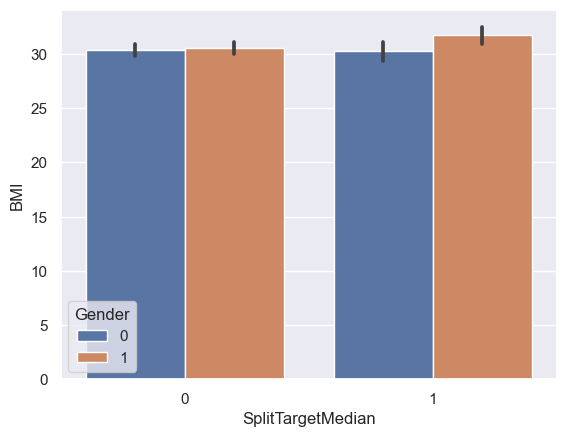

In [85]:
sns.barplot(y='BMI',x='SplitTargetMedian',hue='Gender',data=df)

In [86]:
df.head(2)

,Age,Gender,BMI,Children,Smoker,Region,Charges,Target,SplitTargetMedian
0,19,0,27.90,0,1,3,16884.9240,16884,1
1,18,1,33.77,1,0,2,1725.5523,1725,0


In [87]:
x=df.drop(['Charges','SplitTargetMedian'],axis=1)
y=df.Charges
y=y.astype('int')

<AxesSubplot:>

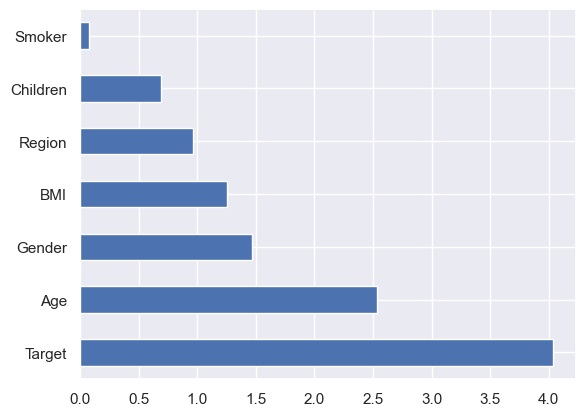

In [88]:
from sklearn.feature_selection import mutual_info_classif
mc = mutual_info_classif(x,y)
ax = pd.Series(mc,index=x.columns)
ax.nlargest(10).plot(kind = 'barh')

<AxesSubplot:ylabel='None'>

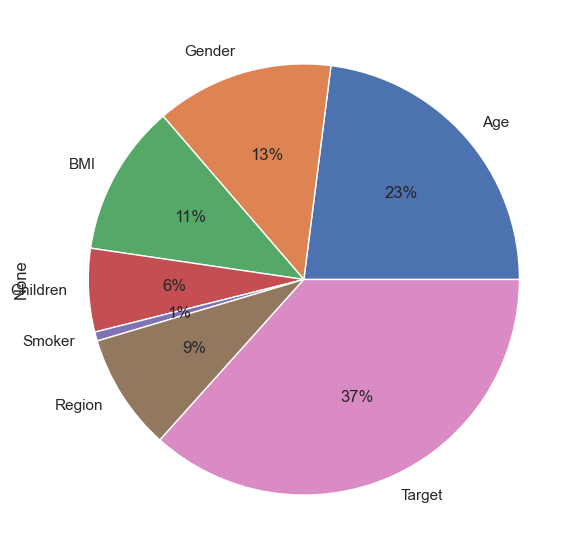

In [89]:
pd.Series(mc,index=x.columns).plot(kind = 'pie',
                                       autopct='%1.0f%%',
                                       figsize = (15,7))

In [90]:
data = df

In [91]:
data.drop(["Charges","SplitTargetMedian"],axis=1,inplace=True)

In [92]:
data.head()

,Age,Gender,BMI,Children,Smoker,Region,Target
0,19,0,27.900,0,1,3,16884
1,18,1,33.770,1,0,2,1725
2,28,1,33.000,3,0,2,4449
3,33,1,22.705,0,0,1,21984
4,32,1,28.880,0,0,1,3866


In [93]:
data.Smoker.value_counts()

0    1064
1     274
Name: Smoker, dtype: int64

In [94]:
x = df.drop("Target",axis=1)
y = df.Target

In [95]:
from sklearn.ensemble import ExtraTreesClassifier
ec = ExtraTreesClassifier()
ec.fit(x,y)

ExtraTreesClassifier()

<AxesSubplot:>

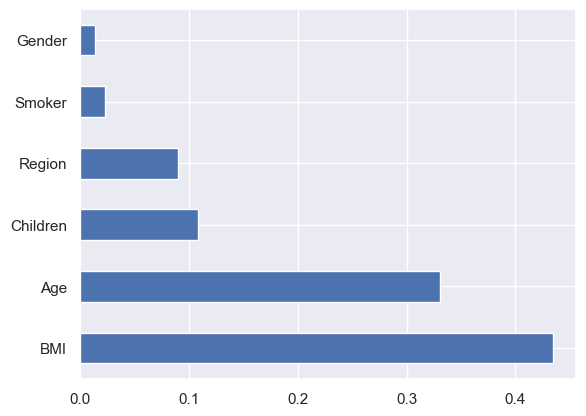

In [96]:
featbar = pd.Series(ec.feature_importances_,index=x.columns)
featbar.nlargest(10).plot(kind = 'barh')

<AxesSubplot:ylabel='None'>

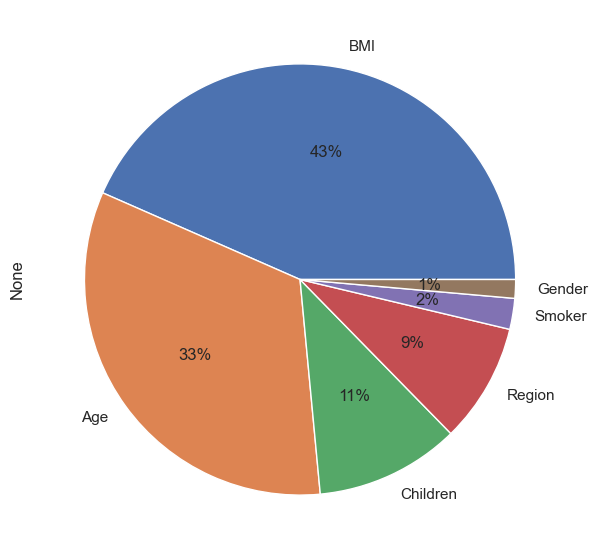

In [97]:
featbar.nlargest(10).plot(kind='pie',
                         autopct='%1.0f%%',figsize = (15,7))

In [98]:
data.head()

,Age,Gender,BMI,Children,Smoker,Region,Target
0,19,0,27.900,0,1,3,16884
1,18,1,33.770,1,0,2,1725
2,28,1,33.000,3,0,2,4449
3,33,1,22.705,0,0,1,21984
4,32,1,28.880,0,0,1,3866


In [99]:
df['SplitTargetMedian']=df['Target'].apply(lambda x:1 if x>=13269 else 0)

In [100]:
df

,Age,Gender,BMI,Children,Smoker,Region,Target,SplitTargetMedian
0,19,0,27.900,0,1,3,16884,1
1,18,1,33.770,1,0,2,1725,0
2,28,1,33.000,3,0,2,4449,0
3,33,1,22.705,0,0,1,21984,1
4,32,1,28.880,0,0,1,3866,0
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600,0
1334,18,0,31.920,0,0,0,2205,0
1335,18,0,36.850,0,0,2,1629,0
1336,21,0,25.800,0,0,3,2007,0


In [101]:
df.Children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: Children, dtype: int64

In [102]:
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [103]:
lst3=[]
for i in df1.children.unique():
    lst3.append(i)
    lst3.append(df1[(df1['children']==i)&df['SplitTargetMedian']==1].shape[0])

print(lst3)

[0, 179, 1, 88, 3, 60, 2, 82, 5, 2, 4, 9]


In [104]:
dict1={
    '0':179, '1':88, '2':82, '3':60, '4':9, '5':2
}

(-1.1251266396501733, 1.101196506726433, -1.118111660231866, 1.127044714020729)

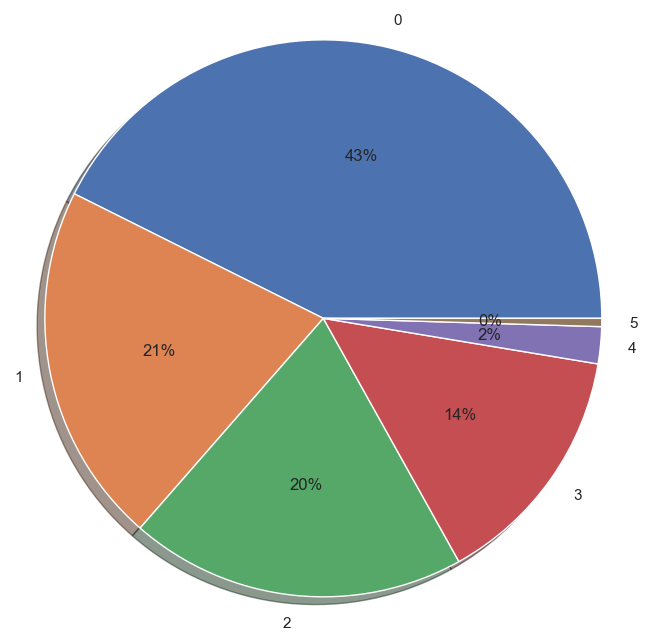

In [105]:
labels=[]
sizes=[]
for x,y in dict1.items():
    labels.append(x)
    sizes.append(y)
plt.figure(figsize=(8,8))
plt.pie(sizes,labels=labels,autopct='%1.0f%%', shadow=True)
plt.axis('equal')

In [106]:
df.head(2)

,Age,Gender,BMI,Children,Smoker,Region,Target,SplitTargetMedian
0,19,0,27.90,0,1,3,16884,1
1,18,1,33.77,1,0,2,1725,0


<AxesSubplot:xlabel='Smoker', ylabel='count'>

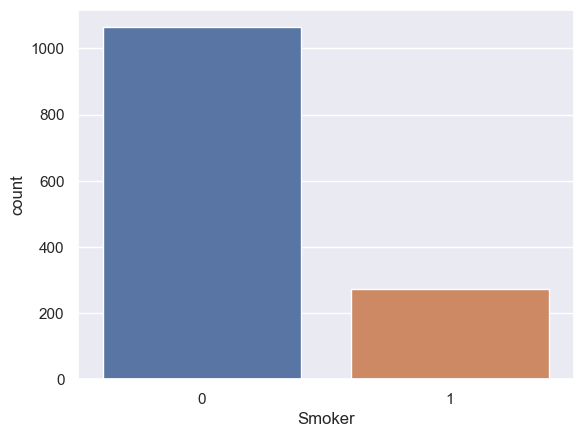

In [107]:
sns.countplot(x="Smoker",data=df)

In [108]:
df.head(2)

,Age,Gender,BMI,Children,Smoker,Region,Target,SplitTargetMedian
0,19,0,27.90,0,1,3,16884,1
1,18,1,33.77,1,0,2,1725,0


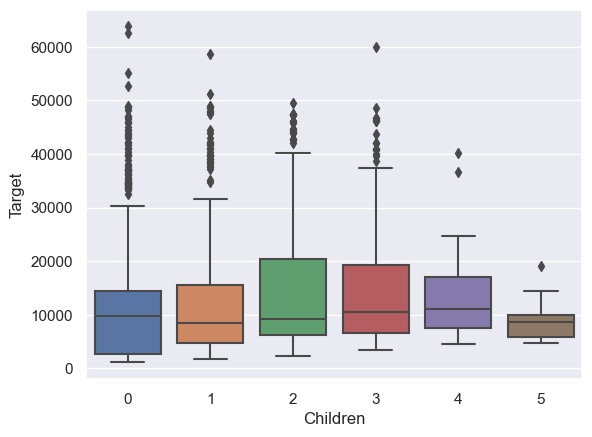

In [109]:
ax = sns.boxplot(x="Children", y="Target", data=df)

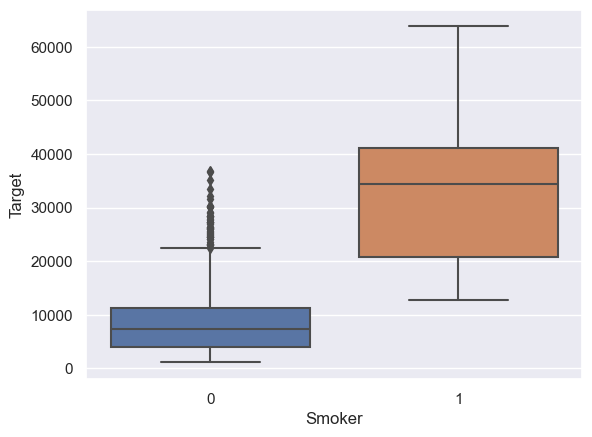

In [110]:
ax = sns.boxplot(x="Smoker", y="Target", data=df)

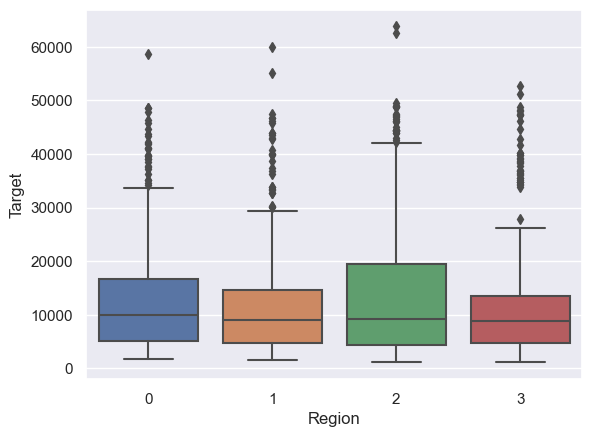

In [111]:
ax = sns.boxplot(x="Region", y="Target", data=df)

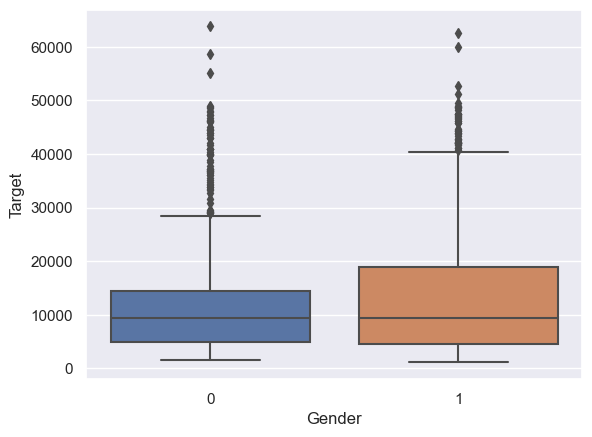

In [112]:
ax = sns.boxplot(x="Gender", y="Target", data=df)

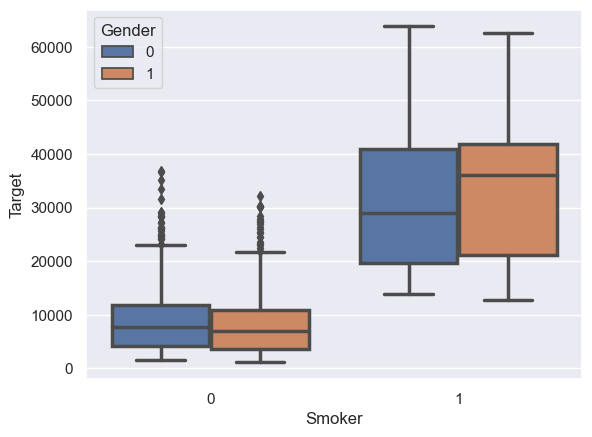

In [113]:
ax = sns.boxplot(x="Smoker", y="Target", hue="Gender",
                 data=df, linewidth=2.5)

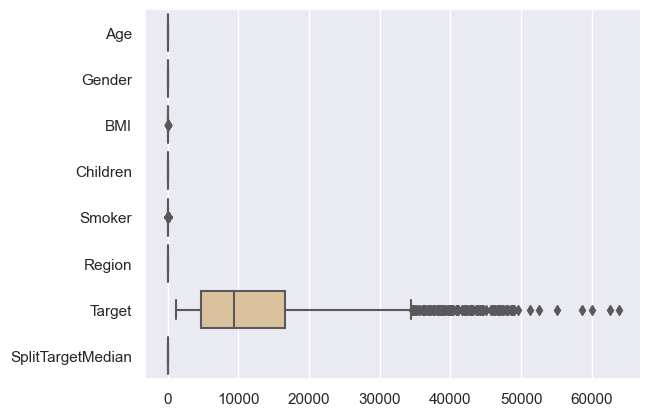

In [114]:
ax = sns.boxplot(data=df, orient="h", palette="Set2")

In [115]:
df.head(2)

,Age,Gender,BMI,Children,Smoker,Region,Target,SplitTargetMedian
0,19,0,27.90,0,1,3,16884,1
1,18,1,33.77,1,0,2,1725,0


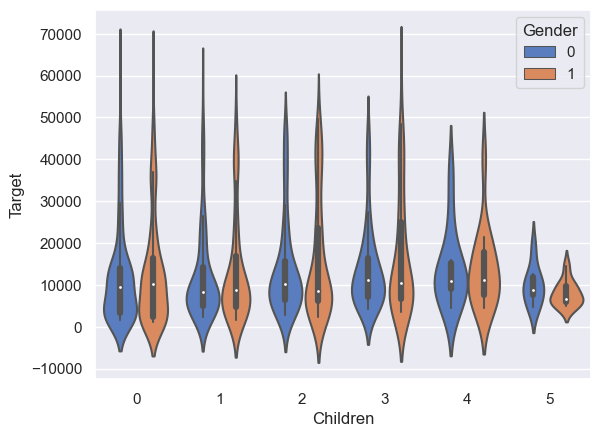

In [116]:
ax = sns.violinplot(x="Children", y="Target", hue="Gender",
                    data=df, palette="muted")

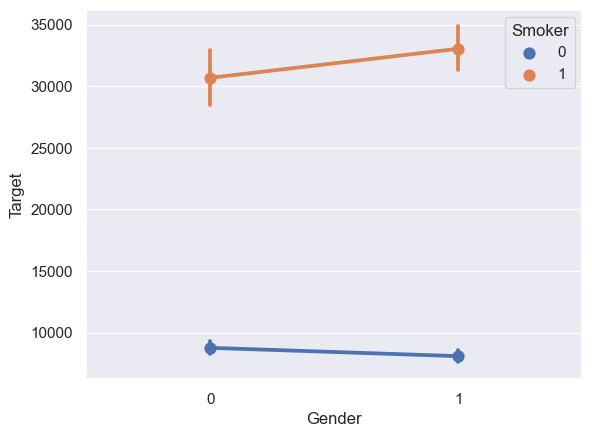

In [117]:
ax = sns.pointplot(x="Gender", y="Target", hue="Smoker",
                   data=df)

In [118]:
df.head(2)

,Age,Gender,BMI,Children,Smoker,Region,Target,SplitTargetMedian
0,19,0,27.90,0,1,3,16884,1
1,18,1,33.77,1,0,2,1725,0


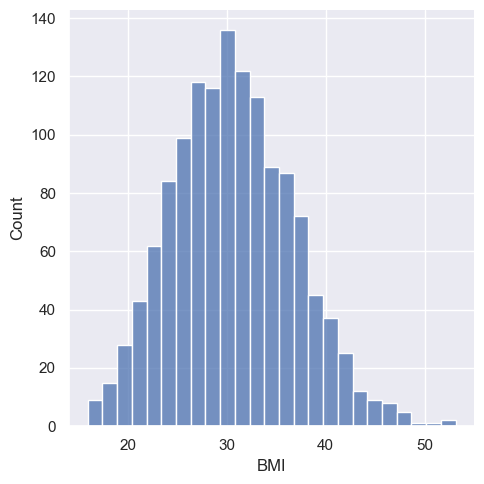

In [119]:
sns.displot(data=df, x="BMI")

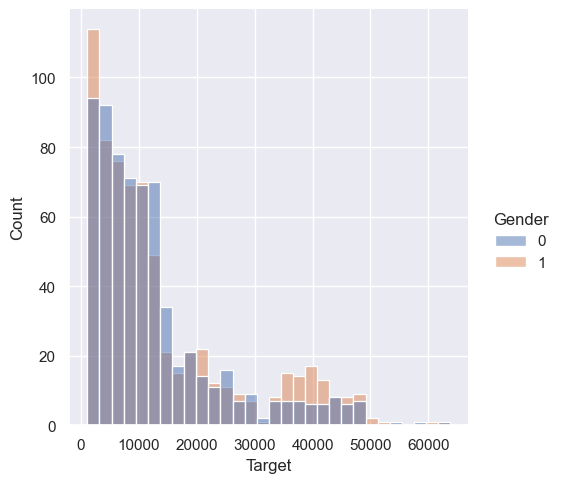

In [120]:
sns.displot(data=df, x="Target",hue="Gender")

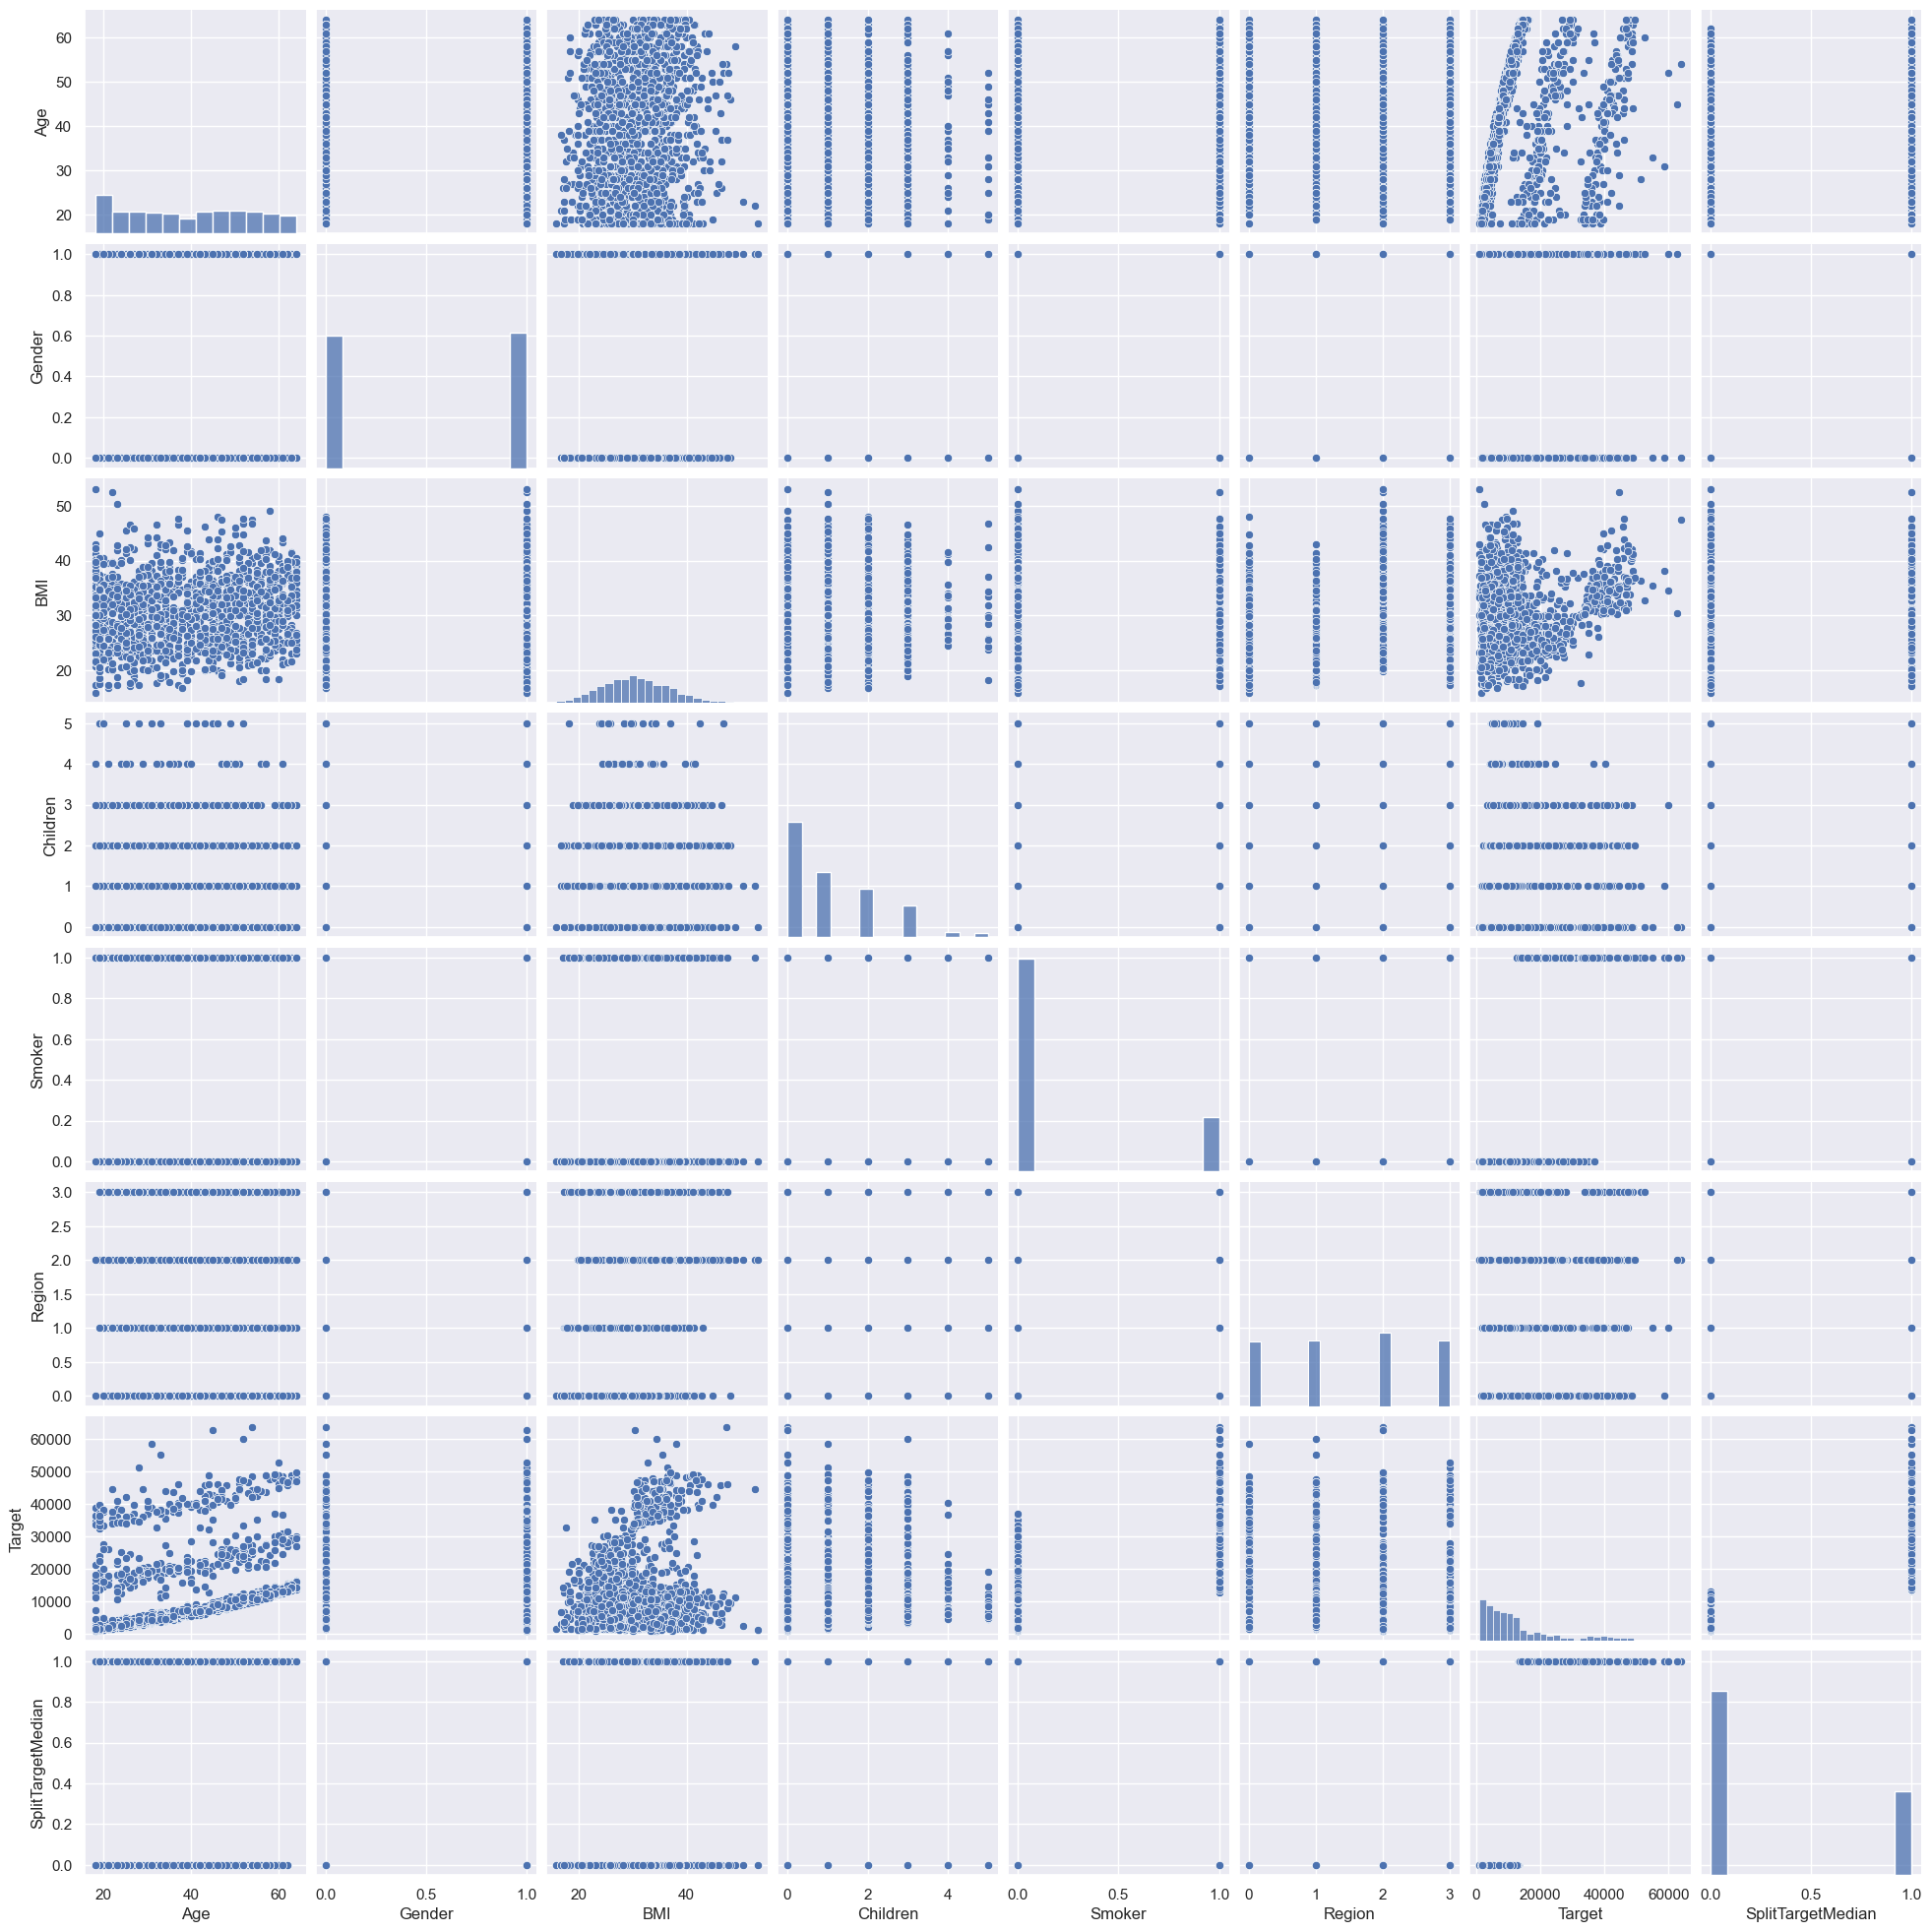

In [121]:
sns.pairplot(df)

In [122]:
df

,Age,Gender,BMI,Children,Smoker,Region,Target,SplitTargetMedian
0,19,0,27.900,0,1,3,16884,1
1,18,1,33.770,1,0,2,1725,0
2,28,1,33.000,3,0,2,4449,0
3,33,1,22.705,0,0,1,21984,1
4,32,1,28.880,0,0,1,3866,0
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600,0
1334,18,0,31.920,0,0,0,2205,0
1335,18,0,36.850,0,0,2,1629,0
1336,21,0,25.800,0,0,3,2007,0


In [128]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score

In [124]:
x = df.drop(["Target","SplitTargetMedian"],axis=1)
y = df.Target

In [125]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,
                                        random_state = 0)

In [126]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

In [146]:
from sklearn.model_selection import GridSearchCV
model = AdaBoostRegressor()
grid_vals = {
    'n_estimators':[50,75,100,150],
    'learning_rate':[1.0,1.5,2.0],
    'loss':['linear', 'square', 'exponential']
}


grid_lr = GridSearchCV(estimator=model, param_grid=grid_vals, scoring='accuracy', 
                       cv=3, refit=True, return_train_score=True) 

grid_lr.fit(x_train, y_train)
preds = grid_lr.best_estimator_.predict(x_test)

In [150]:
grid_lr.best_params_

{'learning_rate': 1.0, 'loss': 'linear', 'n_estimators': 50}

In [156]:
abr=AdaBoostRegressor(n_estimators=50,learning_rate=1,loss='linear')
abr.fit(x_train,y_train)
y_pred=abr.predict(x_test)
r2_score(y_test,y_pred)

0.8710341798561574

In [157]:
import pickle
pickle.dump(abr,open('model.pkl','wb'))

In [163]:
df.head()

,Age,Gender,BMI,Children,Smoker,Region,Target,SplitTargetMedian
0,19,0,27.900,0,1,3,16884,1
1,18,1,33.770,1,0,2,1725,0
2,28,1,33.000,3,0,2,4449,0
3,33,1,22.705,0,0,1,21984,1
4,32,1,28.880,0,0,1,3866,0


In [ ]:
df1.head(

In [162]:
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
